# Import Libraries
Libraries yang dibutuhkan untuk melakukan Clustering
***

In [1]:
import pandas as pd 
import numpy as np

#library untuk melakukan pengolahan file Excel
!pip install openpyxl

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
from scipy import stats

     |████████████████████████████████| 242 kB 5.0 MB/s            


***
# Data Understanding
***
Dataset yang digunakan dalam Clustering ini adalah data rasio keuangan dari Industri Hotel, Restoran, dan Pariwisata tahun 2021 yang tercatat di Bursa Efek Indonesia.

3 variabel rasio keuangan yang digunakan antara lain :
* **Debt to Equity ratio (DER)**, 
* **Return on Asset (ROA)**, dan 
* **Sales Growth.** 

Sumber data didapatkan dari laman Bursa Efek Indonesia [IDX Financial Data and Ratio - Q4 2021](https://www.idx.co.id/data-pasar/laporan-statistik/digital-statistic-beta/financial-data-ratio?q=eyJ5ZWFyIjoiMjAyMSIsIm1vbnRoIjpudWxsLCJxdWFydGVyIjo0LCJ0eXBlIjoieWVhcmx5In0=)  

Tahap pra-pengolahan data dilakukan dengan menggunakan Ms. Excel.

***
# 1. Exploratory Data Analysis
***
# 1.1 Load Data
Melakukan pembacaan data Excel
***

In [2]:
df0 = pd.read_excel('../input/industri/data-emiten.xlsx')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Emiten           32 non-null     object 
 1   DER (X)          32 non-null     float64
 2   Return On Asset  32 non-null     float64
 3   Sales Growth     32 non-null     float64
 4   Category         0 non-null      float64
dtypes: float64(4), object(1)
memory usage: 1.4+ KB


***
# 1.2 Memeriksa nilai null
***

In [3]:
print(df0.isna().sum())

Emiten              0
DER (X)             0
Return On Asset     0
Sales Growth        0
Category           32
dtype: int64


***
# 1.3 Mengganti nilai null dengan 0
***

In [4]:
df0.fillna(0, inplace=True)

***
# 1.4 Deskripsi Data
***

In [5]:
df0.describe()

,DER (X),Return On Asset,Sales Growth,Category
count,32.000000,32.000000,32.000000,32.0
mean,1.159688,-0.038750,-0.087338,0.0
std,1.514624,0.046887,0.428139,0.0
min,0.000000,-0.120000,-0.935965,0.0
25%,0.267500,-0.072500,-0.256105,0.0
50%,0.605000,-0.030000,-0.049366,0.0
75%,1.487500,0.000000,0.063764,0.0
max,7.410000,0.060000,1.465314,0.0


***
# 1.5 Data Cleansing
Drop kolom yang tidak dipakai untuk penentuan Scatter Plot
***

In [6]:
df0.drop(['Category'], axis=1, inplace=True)

***
# 1.6 Scatter Plot
***

<Figure size 1080x1080 with 0 Axes>

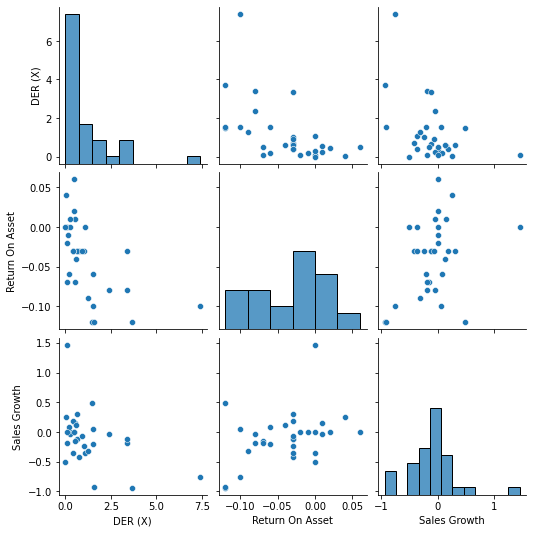

In [7]:
plt.figure(figsize=(15, 15))
sns.pairplot(df0, vars = df0.columns[1:13]);

***
# 2. Clustering
***
# 2.1 Load Data

In [8]:
df0 = pd.read_excel('../input/industri/data-emiten.xlsx')
df1 = df0[['DER (X)','Return On Asset','Sales Growth','Category']]
df1.describe()

,DER (X),Return On Asset,Sales Growth,Category
count,32.000000,32.000000,32.000000,0.0
mean,1.159688,-0.038750,-0.087338,NaN
std,1.514624,0.046887,0.428139,NaN
min,0.000000,-0.120000,-0.935965,NaN
25%,0.267500,-0.072500,-0.256105,NaN
50%,0.605000,-0.030000,-0.049366,NaN
75%,1.487500,0.000000,0.063764,NaN
max,7.410000,0.060000,1.465314,NaN


<AxesSubplot:xlabel='Emiten', ylabel='Return On Asset'>

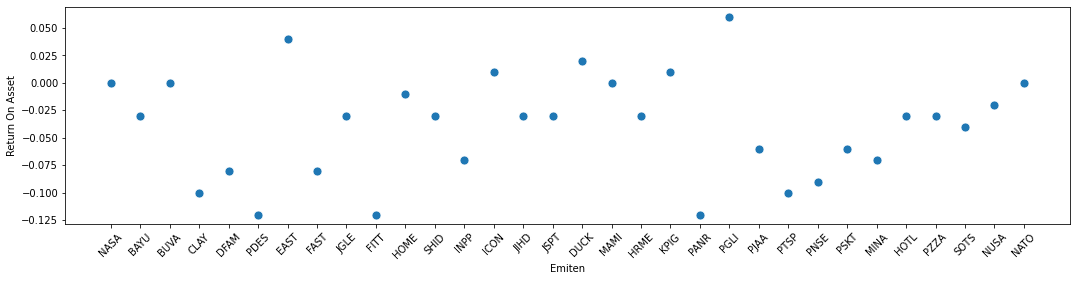

In [9]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emiten', y='Return On Asset', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emiten', ylabel='DER (X)'>

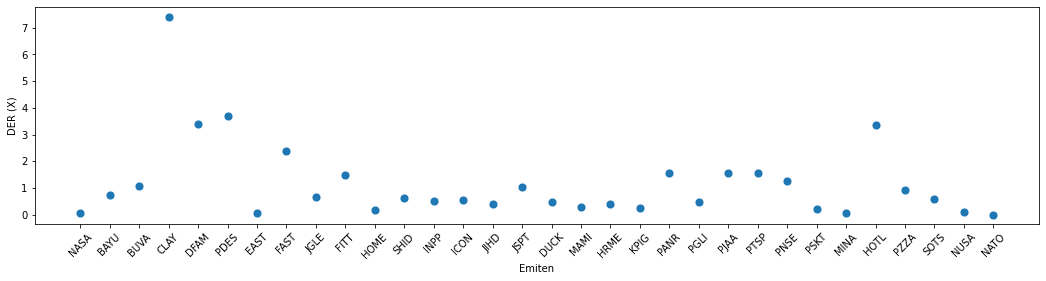

In [10]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emiten', y='DER (X)', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emiten', ylabel='Sales Growth'>

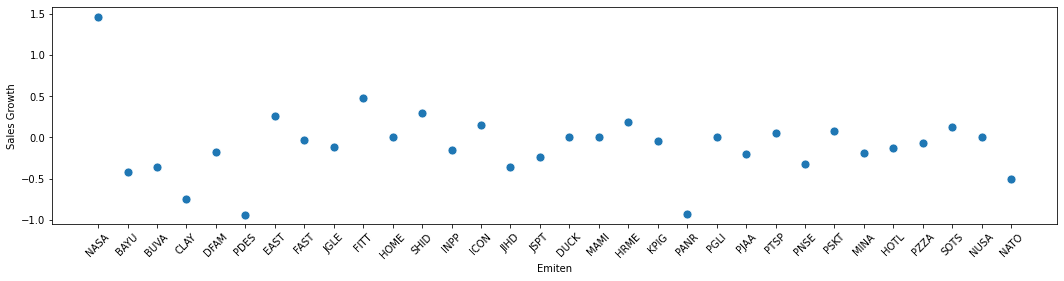

In [11]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emiten', y='Sales Growth', 
                data=df0, s=80)

***
# 2.2 Outlier
Menghapus Outlier menggunakan z-score
***

In [12]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([False] * len(df1))
for col in ['Return On Asset']:
    zscore = abs(stats.zscore(df1[col]))
    filtered_entries = (zscore < 3) | filtered_entries
    
df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 32
Jumlah baris setelah memfilter outlier: 32


In [13]:
df1.describe()

,DER (X),Return On Asset,Sales Growth,Category
count,32.000000,32.000000,32.000000,0.0
mean,1.159688,-0.038750,-0.087338,NaN
std,1.514624,0.046887,0.428139,NaN
min,0.000000,-0.120000,-0.935965,NaN
25%,0.267500,-0.072500,-0.256105,NaN
50%,0.605000,-0.030000,-0.049366,NaN
75%,1.487500,0.000000,0.063764,NaN
max,7.410000,0.060000,1.465314,NaN


***
# 2.3 Standardisasi Fitur
Melakukan normalisasi data menggunakan Standard Scaler
***

In [14]:
feats = ['DER (X)','Return On Asset','Sales Growth']
X = df1[feats].values
y = df1['Category'].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,DER (X),Return On Asset,Sales Growth
count,3.200000e+01,3.200000e+01,3.200000e+01
mean,1.040834e-17,1.110223e-16,-3.469447e-17
std,1.016001e+00,1.016001e+00,1.016001e+00
min,-7.779115e-01,-1.760619e+00,-2.013845e+00
25%,-5.984741e-01,-7.313341e-01,-4.004956e-01
50%,-3.720811e-01,1.896051e-01,9.010959e-02
75%,2.198947e-01,8.396799e-01,3.585726e-01
max,4.192672e+00,2.139829e+00,3.684537e+00


***
# 2.4 Mencari nilai k (elbow point)
Mencari berapakah nilai k (elbow point) yang paling optimal untuk melakukan Clustering
***

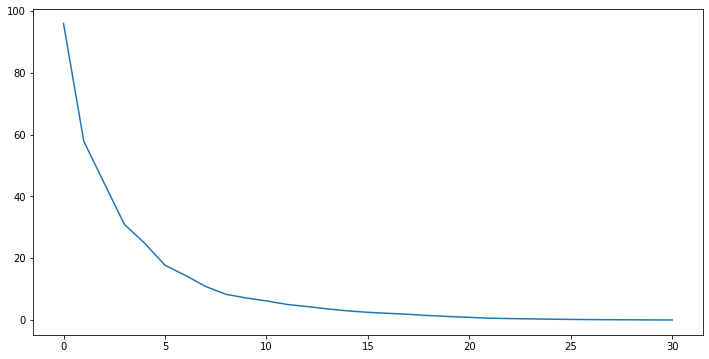

In [15]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 32):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_df.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia) #Elbow Method

Ternyata clustering paling optimal di 5 cluster (n_cluster = 5)
***

***
# 2.5 Lakukan K-means, k = 5
***

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=5, random_state=0)

In [17]:
new_df['target'] = y
new_df['fit'] = kmeans.labels_

***
# 2.6 Plot Cluster
***

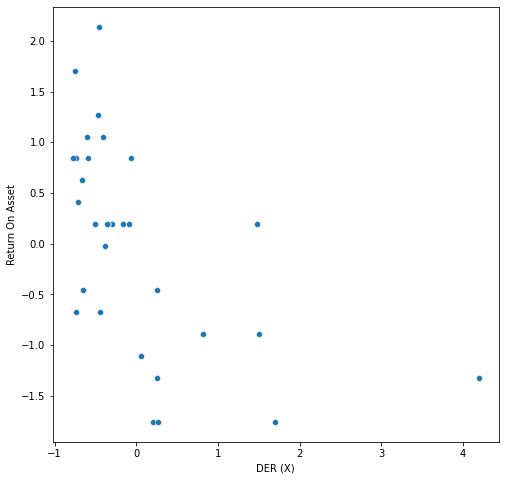

In [18]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='DER (X)', y='Return On Asset', hue=new_df.target.to_list(), data=new_df);

In [19]:
new_df.head(5)

,DER (X),Return On Asset,Sales Growth,target,fit
0,-0.737664,0.839680,3.684537,NaN,3
1,-0.294940,0.189605,-0.787808,NaN,2
2,-0.066870,0.839680,-0.649941,NaN,0
3,4.192672,-1.327236,-1.576373,NaN,1
4,1.496080,-0.893853,-0.224640,NaN,4


***
Mencocokan nilai fit dengan Category untuk membuat indikator warna yang benar.
***

In [20]:
new_df.insert(0,"Category",np.nan,True)
new_df.loc[new_df['fit'] == 0, 'Category'] = 2
new_df.loc[new_df['fit'] == 1, 'Category'] = 4
new_df.loc[new_df['fit'] == 2, 'Category'] = 1
new_df.loc[new_df['fit'] == 3, 'Category'] = 0
new_df.loc[new_df['fit'] == 4, 'Category'] = 3
new_df['Category'] = new_df['Category'].astype(int)
new_df.head(5)

,Category,DER (X),Return On Asset,Sales Growth,target,fit
0,0,-0.737664,0.839680,3.684537,NaN,3
1,1,-0.294940,0.189605,-0.787808,NaN,2
2,2,-0.066870,0.839680,-0.649941,NaN,0
3,4,4.192672,-1.327236,-1.576373,NaN,1
4,3,1.496080,-0.893853,-0.224640,NaN,4


***
Menyesuaikan nama kolom menjadi (St.) = Standardized
***

In [21]:
new_df.drop(["fit","target"], axis=1, inplace=True)
new_df.columns = ['Category','DER (St.)','Return On Asset (St.)', 'Sales Growth (St.)']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Category               32 non-null     int64  
 1   DER (St.)              32 non-null     float64
 2   Return On Asset (St.)  32 non-null     float64
 3   Sales Growth (St.)     32 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.1 KB


***
# 2.6.1 3D Scatter Plot
***

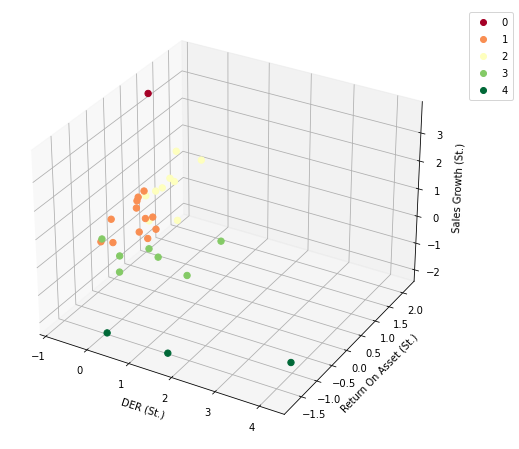

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_df['DER (St.)']
y = new_df['Return On Asset (St.)']
z = new_df['Sales Growth (St.)']

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Return On Asset (St.)")
ax.set_zlabel("Sales Growth (St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_df['Category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

***
# 2.6.2 2D Scatter Plot (X vs Z View)
***

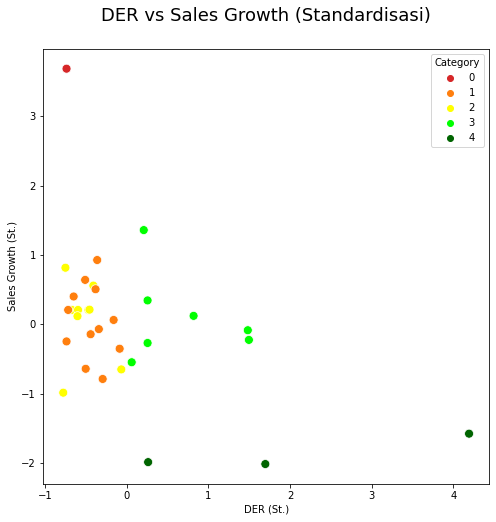

In [23]:
# color palette as dictionary
palette = {0:"tab:red",
           1:"tab:orange", 
           2:"yellow",
           3:"lime",
           4:"darkgreen"}

sns.scatterplot(x='DER (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

***
# 2.6.3 2D Scatter Plot (Y vs Z View)
***

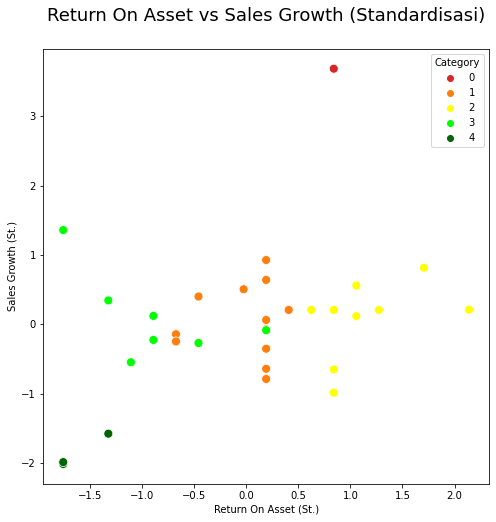

In [24]:
sns.scatterplot(x='Return On Asset (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("Return On Asset vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

***
# 2.6.4 2D Scatter Plot (X vs Y View)
***

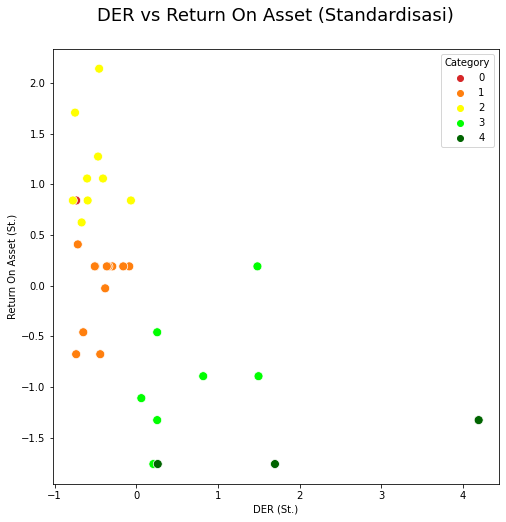

In [25]:
sns.scatterplot(x='DER (St.)', y='Return On Asset (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Return On Asset (Standardisasi)", fontsize=18, y=1.05)
plt.show()

***
# 3. Export Result
Drop kolom yang tidak digunakan pada dataset Awal **(df0).**
***

In [26]:
df0.drop(['Category'], axis=1, inplace=True)

***
Gabungkan dataset List Emiten Pariwisata **(dftemp)**, Result **(new_df)**, dan dataset Awal **(df0)** ke dalam satu dataframe.
***

In [27]:
dftemp = pd.read_excel('../input/industri/pariwisata-list.xlsx')
df = pd.concat([dftemp, new_df, df0], axis=1)
df.head(5)

,Industri,Company,Category,DER (St.),Return On Asset (St.),Sales Growth (St.),Emiten,DER (X),Return On Asset,Sales Growth
0,"Hotel, Restoran & Pariwisata",Andalan Perkasa Abadi Tbk,0,-0.737664,0.839680,3.684537,NASA,0.06,0.00,1.465314
1,"Hotel, Restoran & Pariwisata",Bayu Buana Tbk,1,-0.294940,0.189605,-0.787808,BAYU,0.72,-0.03,-0.419317
2,"Hotel, Restoran & Pariwisata",Bukit Uluwatu Villa Tbk,2,-0.066870,0.839680,-0.649941,BUVA,1.06,0.00,-0.361221
3,"Hotel, Restoran & Pariwisata",Citra Putra Realty Tbk,4,4.192672,-1.327236,-1.576373,CLAY,7.41,-0.10,-0.751615
4,"Hotel, Restoran & Pariwisata",Dafam Property Indonesia Tbk,3,1.496080,-0.893853,-0.224640,DFAM,3.39,-0.08,-0.182000


***
# 3.1 Export hasil ke Excel
***

In [28]:
# membuat objek excel writer
writer = pd.ExcelWriter('output.xlsx')

# menulis dataframe ke Excel
df.to_excel(writer)

# menyimpan file Excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


***
# 4. Get Centroid
***
# 4.1 Jumlah populasi dari setiap Centroid
***

In [29]:
clusters = kmeans.fit_predict(X_std)
unique_elements, counts_elements = np.unique(clusters, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[ 0  1  2  3  4]
 [ 9  3 12  1  7]]


***
# 4.2 Letak Centroid pada setiap Cluster
***

In [30]:
kmeans.cluster_centers_

array([[-0.53344431,  1.15267888,  0.07658094],
       [ 2.05060343, -1.61615812, -1.85883706],
       [-0.43245254, -0.00902882,  0.04201644],
       [-0.73766383,  0.83967992,  3.68453703],
       [ 0.65375468, -0.89385281,  0.09979263]])

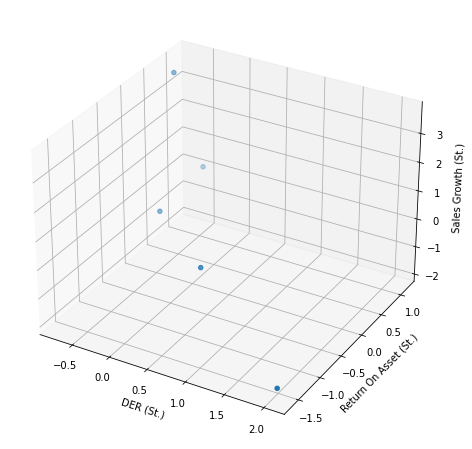

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = [-0.53344431,2.05060343,-0.43245254,-0.73766383,0.65375468]
y = [1.15267888,-1.61615812,-0.00902882,0.83967992,-0.89385281]
z = [0.07658094,-1.85883706,0.04201644,3.68453703,0.09979263]

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Return On Asset (St.)")
ax.set_zlabel("Sales Growth (St.)")
ax.scatter(x, y, z)
plt.show()

***
# 5. Cluster Description
***
# 5.1 Cluster yang terdampak Sangat Negatif
***

In [32]:
#Highly Negatively Impacted
df[df['Category'] == 4].describe() 

,Category,DER (St.),Return On Asset (St.),Sales Growth (St.),DER (X),Return On Asset,Sales Growth
count,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,4.0,2.050603,-1.616158,-1.858837,4.216667,-0.113333,-0.870645
std,0.0,1.989098,0.250214,0.245009,2.965288,0.011547,0.103246
min,4.0,0.261819,-1.760619,-2.013845,1.550000,-0.120000,-0.935965
25%,4.0,0.979569,-1.760619,-2.000069,2.620000,-0.120000,-0.930160
50%,4.0,1.697319,-1.760619,-1.986293,3.690000,-0.120000,-0.924355
75%,4.0,2.944995,-1.543928,-1.781333,5.550000,-0.110000,-0.837985
max,4.0,4.192672,-1.327236,-1.576373,7.410000,-0.100000,-0.751615


In [33]:
display(df[df['Category'] == 4])

,Industri,Company,Category,DER (St.),Return On Asset (St.),Sales Growth (St.),Emiten,DER (X),Return On Asset,Sales Growth
3,"Hotel, Restoran & Pariwisata",Citra Putra Realty Tbk,4,4.192672,-1.327236,-1.576373,CLAY,7.41,-0.10,-0.751615
5,"Hotel, Restoran & Pariwisata",Destinasi Tirta Nusantara Tbk,4,1.697319,-1.760619,-2.013845,PDES,3.69,-0.12,-0.935965
20,"Hotel, Restoran & Pariwisata",Panorama Sentrawisata Tbk,4,0.261819,-1.760619,-1.986293,PANR,1.55,-0.12,-0.924355


***
# 5.2 Cluster yang terdampak Negatif
***

In [34]:
#Negatively Impacted
df[df['Category'] == 3].describe() 

,Category,DER (St.),Return On Asset (St.),Sales Growth (St.),DER (X),Return On Asset,Sales Growth
count,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,3.0,0.653755,-0.893853,0.099793,2.134286,-0.080000,-0.045285
std,0.0,0.618064,0.625535,0.624185,0.921391,0.028868,0.263029
min,3.0,0.060581,-1.760619,-0.546831,1.250000,-0.120000,-0.317770
25%,3.0,0.231634,-1.218890,-0.246913,1.505000,-0.095000,-0.191386
50%,3.0,0.255111,-0.893853,-0.085232,1.540000,-0.080000,-0.123254
75%,3.0,1.150621,-0.677161,0.233128,2.875000,-0.070000,0.010902
max,3.0,1.496080,0.189605,1.358181,3.390000,-0.030000,0.484995


In [35]:
display(df[df['Category'] == 3])

,Industri,Company,Category,DER (St.),Return On Asset (St.),Sales Growth (St.),Emiten,DER (X),Return On Asset,Sales Growth
4,"Hotel, Restoran & Pariwisata",Dafam Property Indonesia Tbk,3,1.496080,-0.893853,-0.224640,DFAM,3.39,-0.08,-0.182000
7,"Hotel, Restoran & Pariwisata",Fast Food Indonesia Tbk,3,0.818578,-0.893853,0.121811,FAST,2.38,-0.08,-0.036007
9,"Hotel, Restoran & Pariwisata",Hotel Fitra International Tbk,3,0.208156,-1.760619,1.358181,FITT,1.47,-0.12,0.484995
22,"Hotel, Restoran & Pariwisata",Pembangunan Jaya Ancol Tbk,3,0.255111,-0.460470,-0.269186,PJAA,1.54,-0.06,-0.200772
23,"Hotel, Restoran & Pariwisata",Pioneerindo Gourmet International Tbk,3,0.255111,-1.327236,0.344445,PTSP,1.54,-0.10,0.057810
24,"Hotel, Restoran & Pariwisata",Pudjiadi & Sons Tbk,3,0.060581,-1.110544,-0.546831,PNSE,1.25,-0.09,-0.317770
27,"Hotel, Restoran & Pariwisata",Saraswati Griya Lestari Tbk,3,1.482664,0.189605,-0.085232,HOTL,3.37,-0.03,-0.123254


***
# 5.3 Cluster yang tidak terdampak (Netral)
***

In [36]:
#Neutral Impacted
df[df['Category'] == 2].describe()

,Category,DER (St.),Return On Asset (St.),Sales Growth (St.),DER (X),Return On Asset,Sales Growth
count,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2.0,-0.533444,1.152679,0.076581,0.364444,0.014444,-0.055067
std,0.0,0.217417,0.485881,0.559551,0.324118,0.022423,0.235793
min,2.0,-0.777911,0.622988,-0.985336,0.000000,-0.010000,-0.502555
25%,2.0,-0.670584,0.839680,0.117517,0.160000,0.000000,-0.037816
50%,2.0,-0.596797,1.056372,0.207257,0.270000,0.010000,0.000000
75%,2.0,-0.455930,1.273063,0.211324,0.480000,0.020000,0.001714
max,2.0,-0.066870,2.139829,0.815640,1.060000,0.060000,0.256370


In [37]:
display(df[df['Category'] == 2])

,Industri,Company,Category,DER (St.),Return On Asset (St.),Sales Growth (St.),Emiten,DER (X),Return On Asset,Sales Growth
2,"Hotel, Restoran & Pariwisata",Bukit Uluwatu Villa Tbk,2,-0.066870,0.839680,-0.649941,BUVA,1.06,0.00,-0.361221
6,"Hotel, Restoran & Pariwisata",Eastparc Hotel Tbk,2,-0.751080,1.706446,0.815640,EAST,0.04,0.04,0.256370
10,"Hotel, Restoran & Pariwisata",Hotel Mandarine Regency Tbk,2,-0.670584,0.622988,0.207257,HOME,0.16,-0.01,0.000000
13,"Hotel, Restoran & Pariwisata",Island Concepts Indonesia Tbk,2,-0.408975,1.056372,0.558253,ICON,0.55,0.01,0.147908
16,"Hotel, Restoran & Pariwisata",Jaya Bersama Indo Tbk,2,-0.469346,1.273063,0.207257,DUCK,0.46,0.02,0.000000
17,"Hotel, Restoran & Pariwisata",Mas Murni Indonesia Tbk,2,-0.596797,0.839680,0.207257,MAMI,0.27,0.00,0.000000
19,"Hotel, Restoran & Pariwisata",MNC Land Tbk,2,-0.603505,1.056372,0.117517,KPIG,0.26,0.01,-0.037816
21,"Hotel, Restoran & Pariwisata",Pembangunan Graha Lestari Indah Tbk,2,-0.455930,2.139829,0.211324,PGLI,0.48,0.06,0.001714
31,"Hotel, Restoran & Pariwisata",Surya Permata Andalan Tbk,2,-0.777911,0.839680,-0.985336,NATO,0.00,0.00,-0.502555


***
# 5.4 Cluster yang terdampak Positif
***

In [38]:
#Positively Impacted
df[df['Category'] == 1].describe()

,Category,DER (St.),Return On Asset (St.),Sales Growth (St.),DER (X),Return On Asset,Sales Growth
count,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,1.0,-0.432453,-0.009029,0.042016,0.515000,-0.039167,-0.069632
std,0.0,0.204655,0.374847,0.518056,0.305093,0.017299,0.218307
min,1.0,-0.737664,-0.677161,-0.787808,0.060000,-0.070000,-0.419317
25%,1.0,-0.544811,-0.135432,-0.272892,0.347500,-0.045000,-0.202333
50%,1.0,-0.412329,0.189605,-0.003312,0.545000,-0.030000,-0.088733
75%,1.0,-0.330156,0.189605,0.427135,0.667500,-0.030000,0.092656
max,1.0,-0.086994,0.406297,0.926658,1.030000,-0.020000,0.303153


In [39]:
display(df[df['Category'] == 1])

,Industri,Company,Category,DER (St.),Return On Asset (St.),Sales Growth (St.),Emiten,DER (X),Return On Asset,Sales Growth
1,"Hotel, Restoran & Pariwisata",Bayu Buana Tbk,1,-0.294940,0.189605,-0.787808,BAYU,0.72,-0.03,-0.419317
8,"Hotel, Restoran & Pariwisata",Graha Andrasentra Propertindo Tbk,1,-0.341895,0.189605,-0.069327,JGLE,0.65,-0.03,-0.116552
11,"Hotel, Restoran & Pariwisata",Hotel Sahid Jaya International Tbk,1,-0.362019,0.189605,0.926658,SHID,0.62,-0.03,0.303153
12,"Hotel, Restoran & Pariwisata",Indonesian Paradise Property Tbk,1,-0.442514,-0.677161,-0.142784,INPP,0.50,-0.07,-0.147506
14,"Hotel, Restoran & Pariwisata",Jakarta International Hotels & Development Tbk,1,-0.502886,0.189605,-0.641091,JIHD,0.41,-0.03,-0.357491
15,"Hotel, Restoran & Pariwisata",Jakarta Setiabudi Internasional Tbk,1,-0.086994,0.189605,-0.351717,JSPT,1.03,-0.03,-0.235550
18,"Hotel, Restoran & Pariwisata",Menteng Heritage Realty Tbk,1,-0.509594,0.189605,0.640295,HRME,0.40,-0.03,0.182480
25,"Hotel, Restoran & Pariwisata",Red Planet Indonesia Tbk,1,-0.650461,-0.460470,0.400955,PSKT,0.19,-0.06,0.081624
26,"Hotel, Restoran & Pariwisata",Sanurhasta Mitra Tbk,1,-0.737664,-0.677161,-0.246617,MINA,0.06,-0.07,-0.191261
28,"Hotel, Restoran & Pariwisata",Sarimelati Kencana Tbk,1,-0.160781,0.189605,0.062702,PZZA,0.92,-0.03,-0.060915


***
# 5.5 Cluster yang terdampak Sangat Positif
***

In [40]:
#Highly Positively Impacted
df[df['Category'] == 0].describe()

,Category,DER (St.),Return On Asset (St.),Sales Growth (St.),DER (X),Return On Asset,Sales Growth
count,1.0,1.000000,1.00000,1.000000,1.00,1.0,1.000000
mean,0.0,-0.737664,0.83968,3.684537,0.06,0.0,1.465314
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,-0.737664,0.83968,3.684537,0.06,0.0,1.465314
25%,0.0,-0.737664,0.83968,3.684537,0.06,0.0,1.465314
50%,0.0,-0.737664,0.83968,3.684537,0.06,0.0,1.465314
75%,0.0,-0.737664,0.83968,3.684537,0.06,0.0,1.465314
max,0.0,-0.737664,0.83968,3.684537,0.06,0.0,1.465314


In [41]:
display(df[df['Category'] == 0])

,Industri,Company,Category,DER (St.),Return On Asset (St.),Sales Growth (St.),Emiten,DER (X),Return On Asset,Sales Growth
0,"Hotel, Restoran & Pariwisata",Andalan Perkasa Abadi Tbk,0,-0.737664,0.83968,3.684537,NASA,0.06,0.0,1.465314
